In [31]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import random
from matplotlib import cm
import numpy as np
import matplotlib.ticker as mtick
import seaborn as sns
import folium

In [32]:
# Read Tables into a pandas DataFrame
df_table1 = pd.read_csv('calderdale-adult-learning-courses-autumn-2019-2.csv')
df_table2 = pd.read_csv('calderdale-adult-learning-courses-spring-and-summer-2020-1.csv')


In [33]:
# Data cleaning and transformation

#Convert the column to string format
df_table2['Start time'] = df_table2['Start time'].apply(lambda x: str(x))
df_table2['End time'] = df_table2['End time'].apply(lambda x: str(x))

# Convert the string to a datetime object and then format as string with time
df_table2['Start time'] = df_table2['Start time'].apply(lambda x: datetime.datetime.strptime(x, "%H.%M").strftime("%H:%M:%S"))
df_table2['End time'] = df_table2['End time'].apply(lambda x: datetime.datetime.strptime(x, "%H.%M").strftime("%H:%M:%S"))


# remove special characters and define a dictionary of characters to be replaced and their replacements
special_chars = {'ï¿½','ï¿½-','�'}
df_table2['Full Fee'] = df_table2['Full Fee'].str.replace('special_chars', '')
df_table2['Full Fee'] = df_table2['Full Fee'].str.replace('�', '')
df_table2['Early Enrolment Fee'] = df_table2['Early Enrolment Fee'].str.replace('special_chars', '')
df_table2['Early Enrolment Fee'] = df_table2['Early Enrolment Fee'].str.replace('�', '')

# remove rows with no course codes
df_table2 = df_table2.drop(df_table2[df_table2['Course Code'] == 'Assessment required - please call 01422 392820 to book'].index)
df_table2 = df_table2.drop(df_table2[df_table2['Course Code'] == ' '].index)


df_combined = pd.concat([df_table1, df_table2])


# replace NaN values in a specific column with 0
df_combined['Start Time'] = df_combined['Start Time'].fillna(0)
df_combined['End Time'] = df_combined['End Time'].fillna(0)
df_combined= df_combined.drop(df_combined[df_combined['Start Time'] == 'Various'].index)
df_combined= df_combined.drop(df_combined[df_combined['End Time'] == 'Various'].index)
df_combined['Start Date'] = pd.to_datetime(df_combined['Start Date'])

#Extract year and month from start time column
df_combined['Year'] = df_combined['Start Date'].dt.year
df_combined['Month'] = df_combined['Start Date'].dt.month_name()
df_combined['Start Time'] = df_combined.apply(lambda row: row['Start Time'] if row['Start Time'] != 0 else row['Start time'], axis=1)
df_combined['End Time'] = df_combined.apply(lambda row: row['End Time'] if row['End Time'] != 0 else row['End time'], axis=1)

# drop the original "Start time" and "End time" columns
df_combined = df_combined.drop(['Start time', 'End time'], axis=1)

#df_combined.to_csv('my_data.csv', index=False)


C:\Users\a4app\AppData\Local\Temp\ipykernel_3580\2376693445.py:32: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df_combined['Start Date'] = pd.to_datetime(df_combined['Start Date'])


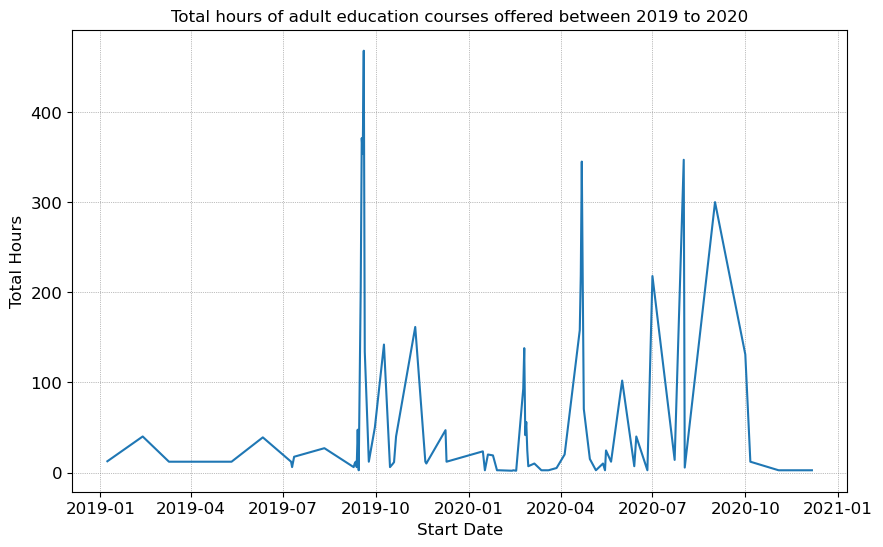

In [34]:
# Line chart that display the course trend

enrollment = df_combined.groupby('Start Date')['Total Hours'].sum()

# convert the enrollment Series to a DataFrame
enrollment_df = enrollment.to_frame()
enrollment_df=enrollment_df.sort_index()

# convert the index to datetime format
enrollment_df.index = pd.to_datetime(enrollment_df.index)

# plot the enrollment over time as a line plot
fig = plt.figure(figsize=(10, 6))  # set the figure size
plt.grid(True, linestyle=':', linewidth=0.5, color='gray')
plt.plot(enrollment_df.index, enrollment_df['Total Hours'])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Total hours of adult education courses offered between 2019 to 2020', fontsize=12)
plt.xlabel('Start Date', fontsize=12)
plt.ylabel('Total Hours', fontsize=12)
plt.show()






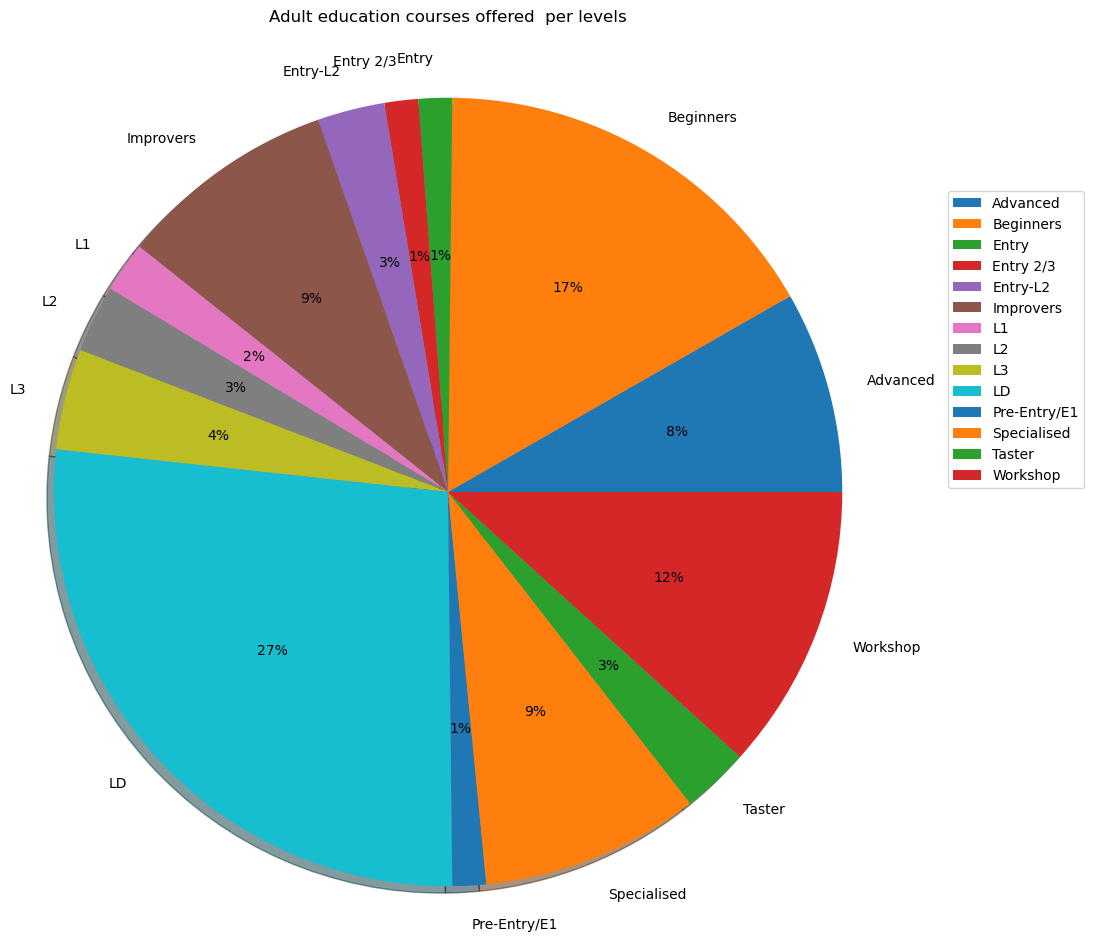

In [7]:
# Pie chart that displays the number of courses


# count the number of courses in each program area
Level1 = df_combined.groupby('Level')['Course Code'].nunique()

# create a pie chart
fig = plt.figure(figsize=(15, 8)) # set the figure size
ax=Level1.plot(kind='pie', legend=True,autopct='%1.0f%%',radius=1.6,shadow=True)
ax.legend(bbox_to_anchor=(1.3, 1), loc='upper left')

plt.title('Adult education courses offered  per levels', fontsize=12,  y=1.25)
plt.axis('off')
plt.show()



C:\Users\a4app\AppData\Local\Temp\ipykernel_3580\86225514.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_df['Full Fee'] = selected_df ['Full Fee'].str.replace('-', '')


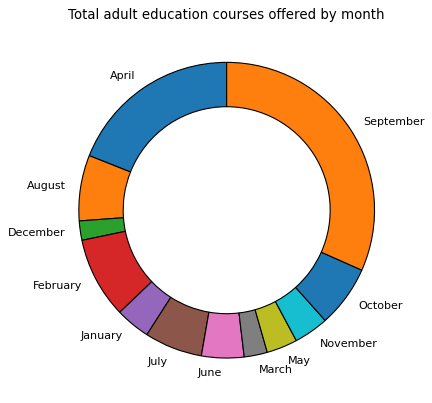

In [49]:


# Select the rows with the desired levels
selected_levels = ['Beginners', 'LD', 'Workshop']
selected_df = df_combined[df_combined['Level'].isin(selected_levels)]

selected_df['Full Fee'] = selected_df ['Full Fee'].str.replace('-', '')
selected_df = selected_df.drop(selected_df[selected_df ['Full Fee'] == ' '].index)
selected_df= selected_df.sort_values('Full Fee', ascending=False)

# Plot the results as a bar chart

# Group the courses by month and count the number of occurrences in each group
counts = df_combined.groupby(df_combined['Month'])['Course Code'].count()
counts = counts.sort_index()

fig, ax = plt.subplots(figsize=(10, 6),dpi=80)
counts.plot(kind='pie',wedgeprops = {"edgecolor" : "black",'width':0.3,
                      'antialiased': True}, startangle=90)
ax.set_xlabel('Month')
ax.set_ylabel('Count')
plt.title('Total adult education courses offered by month', fontsize=12,  y=1)
plt.axis('off')
plt.show()




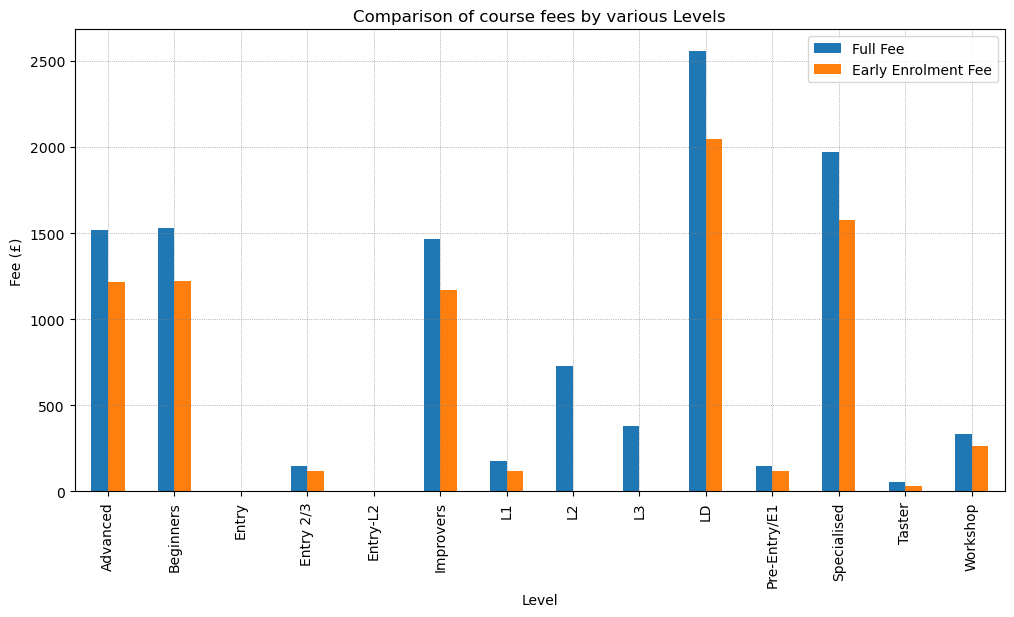

In [29]:

# Filter the data for the year 2020
df_table3 = pd.read_csv('my_data.csv')
df_2020 = df_table3[df_table3['Year'] == 2020]

# Group the data by level and sum the full fee and early enrollment fee
grouped_df = df_2020.groupby('Level')[['Full Fee', 'Early Enrolment Fee']].sum()

ax = grouped_df.plot(kind='bar', figsize=(12,6))
ax.set_title('Comparison of course fees by various Levels')
ax.set_xlabel('Level')
ax.set_ylabel('Fee (£)')
plt.grid(True, linestyle=':', linewidth=0.5, color='gray')
plt.show()



In [23]:

# Create a map centered on the average location of all courses
center_lat = df_table3['Latitude'].mean()
center_lon = df_table3['Longitude'].mean()
m = folium.Map(location=[center_lat, center_lon], zoom_start=10)

# Add a marker for each course location
for index, row in df_table3.iterrows():
    popup_text = f"{row['Course Code']}: {row['Description']}:{row['Postcode']}"
    folium.Marker(location=[row['Latitude'], row['Longitude']],
                  popup=popup_text).add_to(m)

# Display the map
m

#save the map in html
#m.save('course_map.html')
